# Example: running an RSMD calculation on Google-Cloud hosted membrane protein trajectory

Prerequisites:

- Create a python environment with `zarrtraj` installed (see [installation](https://zarrtraj.readthedocs.io/en/latest/installation.html#installation))
- Install `ipykernel` to be able to run jupyter notebooks
- Install `matplotlib` for plotting

MD Trajectory is the [YiiP 90ns trajectory from MDAnalysisData](https://www.mdanalysis.org/MDAnalysisData/yiip_equilibrium.html)


## 1. Use `fsspec` to load the topology file into memory


In [12]:
import fsspec
from io import StringIO

with fsspec.open("gcs://zarrtraj-test-data/YiiP_system.pdb", "r") as f:
    yiip_topology = StringIO(f.read())

## 2. Instantiate an MDAnalysis `Universe` using the in-memory topology file and Google Cloud bucket trajectory URL


In [13]:
import zarrtraj
import MDAnalysis as mda

u = mda.Universe(
    yiip_topology, "gcs://zarrtraj-test-data/yiip.zarrmd", topology_format="PDB"
)

/Users/lwoods/miniconda3/envs/zarrtraj-prod/lib/python3.13/site-packages/MDAnalysis/topology/PDBParser.py:346: UserWarning: Unknown element Z found for some atoms. These have been given an empty element record. If needed they can be guessed using universe.guess_TopologyAttrs(context='default', to_guess=['elements']).
  warnings.warn(wmsg)
/Users/lwoods/miniconda3/envs/zarrtraj-prod/lib/python3.13/site-packages/MDAnalysis/topology/PDBParser.py:346: UserWarning: Unknown element D found for some atoms. These have been given an empty element record. If needed they can be guessed using universe.guess_TopologyAttrs(context='default', to_guess=['elements']).
  warnings.warn(wmsg)
/Users/lwoods/miniconda3/envs/zarrtraj-prod/lib/python3.13/site-packages/zarrtraj/ZARR.py:522: UserWarning: Zarrtraj is using the experimental protocol 'gcs' which may lead to unexpected behavior. Please report any issues on the Zarrtraj GitHub.
  warnings.warn(


## 3. Calculate the RMSD of the alpha carbons in the trajectory


In [ ]:
from MDAnalysis.analysis import rms

# create a reference frame to perform RMSD against
calpha_ref = mda.Universe(yiip_topology, topology_format="PDB").select_atoms("name CA")

calpha_traj = u.atoms.select_atoms("name CA")

rmsd_analysis = rms.RMSD(calpha_traj, calpha_ref).run(step=100)

frame, time, rmsd = rmsd_analysis.results.rmsd.T

/Users/lwoods/miniconda3/envs/zarrtraj-prod/lib/python3.13/site-packages/MDAnalysis/topology/PDBParser.py:346: UserWarning: Unknown element Z found for some atoms. These have been given an empty element record. If needed they can be guessed using universe.guess_TopologyAttrs(context='default', to_guess=['elements']).
  warnings.warn(wmsg)
/Users/lwoods/miniconda3/envs/zarrtraj-prod/lib/python3.13/site-packages/MDAnalysis/topology/PDBParser.py:346: UserWarning: Unknown element D found for some atoms. These have been given an empty element record. If needed they can be guessed using universe.guess_TopologyAttrs(context='default', to_guess=['elements']).
  warnings.warn(wmsg)


## 4. Plot the RMSD of the trajectory over time


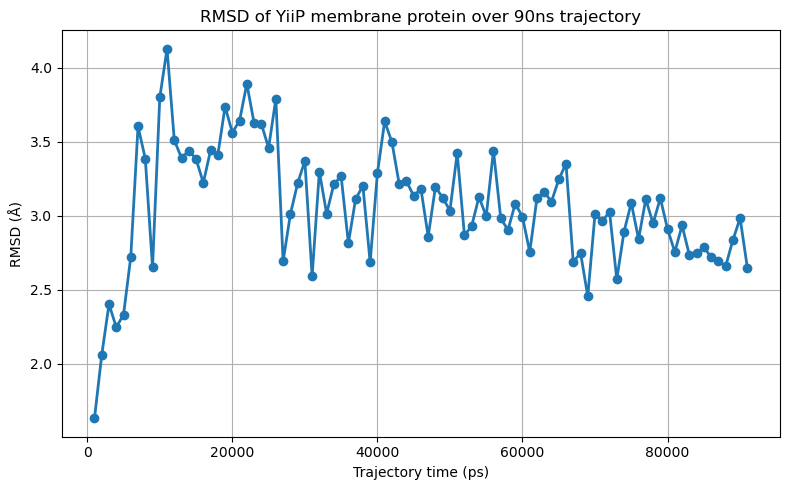

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(time, rmsd, marker='o', linestyle='-', linewidth=2)

plt.xlabel("Trajectory time (ps)")
plt.ylabel("RMSD (Å)")
plt.title("RMSD of YiiP membrane protein over 90ns trajectory")
plt.grid(True)
plt.tight_layout()

plt.show()